## Training of GAiA's neural network

In [1]:
from model.GAiA_network import GAiA_Network, coeff_determination
from lib.dataset_utils import read_many_hdf5, board_shape

import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

if tf.test.gpu_device_name(): 
  print(f"Default GPU Device: {tf.test.gpu_device_name()}")

Default GPU Device: /device:GPU:0


2022-01-13 00:24:47.661393: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-13 00:24:47.699551: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 00:24:47.732202: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 00:24:47.732400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

We retrieve the model's optimal hyperparameters from the `choose_hyperparameters` notebook.

In [2]:
input_file = open("model/hyperparameters.pickle", "rb")
hyperparams = pickle.load(input_file)
input_file.close()
print(hyperparams)

{'nb_blocks': 4, 'filters': 64}


We create a model with these hyperparameters.

In [3]:
model = None
try:
  model = tf.keras.models.load_model("model/GAiA_Network.h5", custom_objects={"coeff_determination":coeff_determination})
except:
  model = GAiA_Network(board_shape, hyperparams)
  model.compile(loss="mean_absolute_error", optimizer="adam", metrics=[coeff_determination])
model.summary()

2022-01-13 00:24:48.343136: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 00:24:48.343344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 00:24:48.343482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 00:24:48.343766: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-13 00:24:48.343921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

Model: "GAiA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 8, 8, 15)]   0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 8, 8, 64)     1024        ['input[0][0]']                  
                                                                                                  
 batch_normalization (BatchNorm  (None, 8, 8, 64)    256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 8, 8, 64)     4160        ['batch_normalization[0][0]'] 

It's time to train! You can take a coffee or two (maybe more).

In [4]:
directory = "/media/gaetan/HDD/IA/Chess/Datasets/SE_ResNet/"
nb_epochs = 50
nb_pos = 992346

positions_train, scores_train = read_many_hdf5(nb_pos, directory, "_train")
history = model.fit(
            positions_train,
            scores_train,
            validation_split=0.1,
            verbose=1,
            epochs=nb_epochs,
            batch_size=1024
          )

output_file = open(f"model/histories/history_{nb_pos}.pickle", "wb")
pickle.dump(history, output_file)
output_file.close()

2022-01-13 00:25:41.109851: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3429546240 exceeds 10% of free system memory.
2022-01-13 00:25:43.145437: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3429546240 exceeds 10% of free system memory.


Epoch 1/50


2022-01-13 00:25:46.444562: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


873/873 [==============================] - 24s 24ms/step - loss: 140.5919 - coeff_determination: 0.9236 - val_loss: 220.5936 - val_coeff_determination: 0.8094
Epoch 2/50
873/873 [==============================] - 20s 23ms/step - loss: 138.8758 - coeff_determination: 0.9264 - val_loss: 286.7426 - val_coeff_determination: 0.7338
Epoch 3/50
873/873 [==============================] - 20s 23ms/step - loss: 138.1771 - coeff_determination: 0.9278 - val_loss: 178.9034 - val_coeff_determination: 0.8579
Epoch 4/50
873/873 [==============================] - 20s 23ms/step - loss: 137.5636 - coeff_determination: 0.9280 - val_loss: 156.6319 - val_coeff_determination: 0.8767
Epoch 5/50
873/873 [==============================] - 20s 23ms/step - loss: 137.4336 - coeff_determination: 0.9280 - val_loss: 167.8550 - val_coeff_determination: 0.8683
Epoch 6/50
873/873 [==============================] - 20s 23ms/step - loss: 136.6324 - coeff_determination: 0.9292 - val_loss: 175.4802 - val_coeff_determination

2022-01-13 00:41:58.392787: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://57af332f-b746-4c4e-ac6e-ea3b9fcbb2f6/assets


/home/gaetan/.local/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/home/gaetan/.local/lib/python3.9/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


We save the model.

In [5]:
model.save("model/GAiA_Network.h5")

We convert the model to onnx format so that the engine can use it.

In [6]:
tf.saved_model.save(model, "model/GAiA_Network")
!python3.9 -m tf2onnx.convert --saved-model model/GAiA_Network --output ../Engine/build/network.onnx

INFO:tensorflow:Assets written to: model/GAiA_Network/assets
/usr/lib/python3.9/runpy.py:127: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-01-13 00:42:08,996 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-01-13 00:42:10,381 - INFO - Signatures found in model: [serving_default].
2022-01-13 00:42:10,381 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-01-13 00:42:10,381 - INFO - Output names: ['output']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-01-13 00:42:10,679 - WARNING - From /home/gaetan/.local/lib/python3.9/site-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.gra

In [7]:
def plot_history(history, path=None):
  epochs = range(1, nb_epochs + 1)

  _, axs = plt.subplots(1, 2, figsize=(20, 5))
  loss = history.history["loss"]
  score = history.history["coeff_determination"]

  axs[0].plot(epochs, loss, "r-.")
  axs[0].set_xlabel("Epoch")
  axs[0].set_ylabel("Mean Absolute Error")
  axs[0].set_title("Training loss")

  axs[1].plot(epochs, score, "g-.")
  axs[1].set_xlabel("Epoch")
  axs[1].set_ylabel("$R^2$")
  axs[1].set_title("Training score")
  
  if path:
    plt.savefig(path)

We plot the loss and accuracy of each epoch.

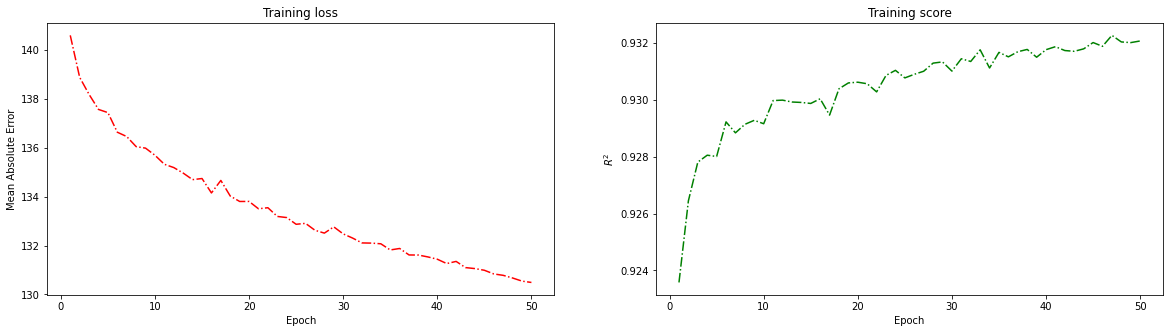

In [8]:
plot_history(history, path="results/GAiA_history")